<a href="https://colab.research.google.com/github/Narennnnn/MLProjects/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

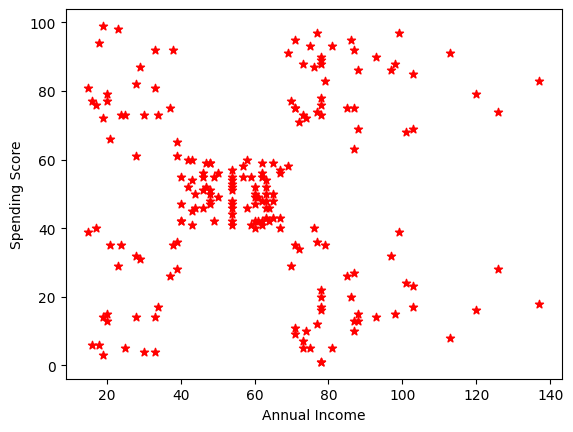

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


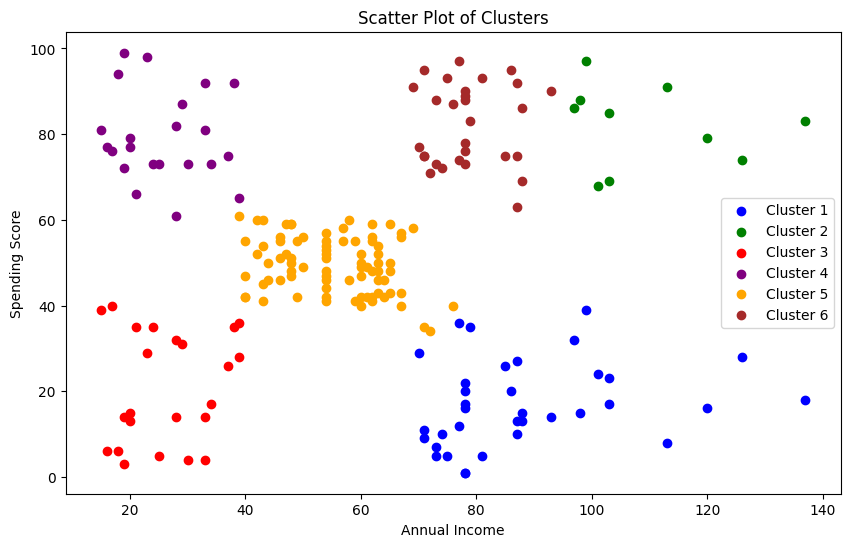

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

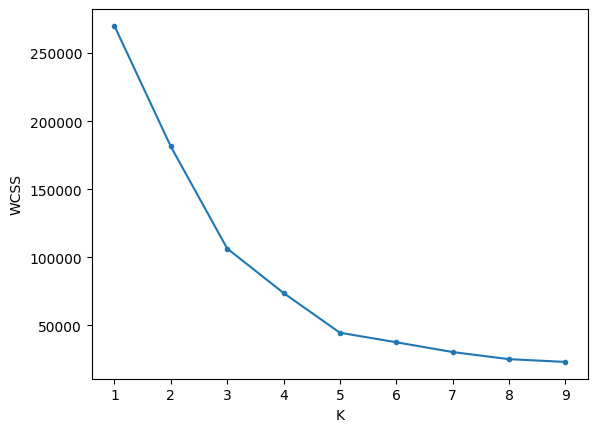

In [4]:
"""
K-Means Clustering Analysis
Author: Your Name
Date: September 1, 2023
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data from 'Mall_Customers.csv'
df = pd.read_csv('Mall_Customers.csv')

# Rename columns
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)

# Scatter plot of Income vs. Spending Score
plt.scatter(df.Income, df.Score, marker='*', color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Create and fit the KMeans model
km = KMeans(n_clusters=6)
results = km.fit_predict(df[['Income', 'Score']])
df['Cluster'] = results

# Separate data by clusters
clusters = []
for cluster_id in range(6):
    clusters.append(df[df['Cluster'] == cluster_id])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

colors = [
    'blue', 'green', 'red',
    'purple', 'orange', 'brown'
]

for i, cluster_df in enumerate(clusters):
    plt.scatter(
        cluster_df['Income'], cluster_df['Score'], color=colors[i], label=f'Cluster {i + 1}'
    )

plt.legend()
plt.show()

# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different values of K
k_rng = range(1, 10)
wcss = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Income', 'Score']])
    wcss.append(km.inertia_)

# Plot the Elbow Method
plt.plot(k_rng, wcss, marker='.')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()
